In [90]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import spacy
import en_core_web_sm
lang=spacy.load('en_core_web_sm')

In [91]:
twitter = pd.read_csv(r"D:\data set\Sentiment.csv")

In [92]:
twitter.shape

(13871, 21)

In [93]:
twitter.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [94]:
twitter.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [95]:
twitter=twitter[['sentiment','text']]

In [96]:
twitter

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...
13866,Negative,RT @cappy_yarbrough: Love to see men who will ...
13867,Positive,RT @georgehenryw: Who thought Huckabee exceede...
13868,Positive,"RT @Lrihendry: #TedCruz As President, I will a..."
13869,Negative,RT @JRehling: #GOPDebate Donald Trump says tha...


In [97]:
twitter.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [98]:
index_name=twitter.sentiment[twitter['sentiment']=='Neutral'].index

In [99]:
twitter.drop(index_name,inplace=True)

In [100]:
twitter.sentiment.value_counts()

Negative    8493
Positive    2236
Name: sentiment, dtype: int64

In [101]:
twitter.sentiment.replace({'Negative':0,'Positive':1 },inplace=True)

In [102]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char  not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in lang.Defaults.stop_words]


In [66]:
twitter.text=twitter.text.str.lower()

In [67]:
import string

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(twitter['text'])
Text_bow = bow_transformer.transform(twitter.text)
from sklearn.model_selection import train_test_split
df_x_train,df_x_test,df_y_train,df_y_test = train_test_split(Text_bow,twitter.sentiment ,test_size=.2)

In [69]:
print(df_x_train.shape)
print(df_y_train.shape)
print(">......<")
print(df_x_test.shape)
print(df_y_test.shape)

(8583, 15986)
(8583,)
>......<
(2146, 15986)
(2146,)


In [78]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(df_x_train,df_y_train)
pred=nb.predict(df_x_test)
from sklearn.metrics import confusion_matrix
tab_nb=confusion_matrix(df_y_test,pred)
tab_nb

array([[1506,  215],
       [ 182,  243]], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(df_y_test,pred)
acc_nb*100

81.5004659832246

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(df_x_train,df_y_train)
pred_rfc=rfc.predict(df_x_test)
tab_rfc=confusion_matrix(df_y_test,pred_rfc)
tab_rfc

array([[1654,   67],
       [ 243,  182]], dtype=int64)

In [81]:
acc_rfc=accuracy_score(df_y_test,pred_rfc)
acc_rfc*100

85.55452003727866

In [76]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(df_x_train,df_y_train)
pred_adb=adb.predict(df_x_test)
tab_abd=confusion_matrix(df_y_test,pred_adb)
tab_abd

array([[1649,   72],
       [ 250,  175]], dtype=int64)

In [82]:
acc_abd=accuracy_score(df_y_test,pred_adb)
acc_abd*100

84.99534016775397

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gdb=GradientBoostingClassifier()
gdb.fit(df_x_train,df_y_train)
pred_gdb=adb.predict(df_x_test)
tab_gdb=confusion_matrix(df_y_test,pred_gdb)
tab_gdb

array([[1649,   72],
       [ 250,  175]], dtype=int64)

In [84]:
acc_gdb=accuracy_score(df_y_test,pred_gdb)
acc_gdb*100

84.99534016775397

In [85]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(df_x_train,df_y_train)
pred_xgb=xgb.predict(df_x_test)
tab_xgb=confusion_matrix(df_y_test,pred_xgb)
tab_xgb

C:\Users\Priti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[1667,   54],
       [ 250,  175]], dtype=int64)

In [86]:
acc_xgb=accuracy_score(df_y_test,pred_xgb)
acc_xgb*100

85.834109972041

In [87]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt


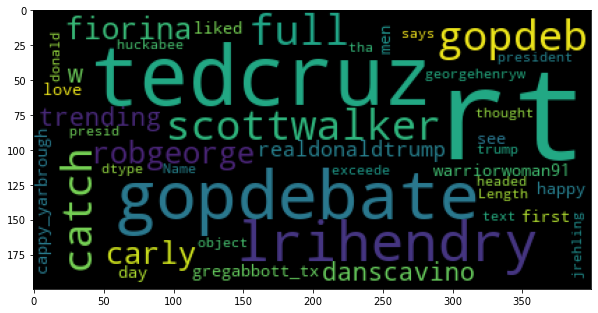

In [89]:
cloud  = WordCloud(stopwords = stopwords.words("english")).generate(str(twitter['text']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)